In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the Basics about data

In [394]:
df = pd.read_excel('Data_Train.xlsx')

In [395]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [397]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [398]:
df[df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [399]:
df.dropna(inplace = True)

In [400]:
df.shape

(10682, 11)

In [401]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [402]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [403]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

##### Better way to convert multiple columns to datetime \n 

###### data.iloc[:, 7:12] = data.iloc[:, 7:12].apply(pd.to_datetime, errors='coerce')

In [404]:
# Change Data to Datetime format
def change_to_datetime(col):
    return pd.to_datetime(col)

coln = ['Date_of_Journey','Dep_Time','Arrival_Time']

In [405]:
df[coln] = df[coln].apply(lambda x: change_to_datetime(x))

/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [407]:
# Splitting Date of Journery to Muliple Columns for ML
df['journey_year'] = df.Date_of_Journey.dt.year
df['journey_month'] = df.Date_of_Journey.dt.month
df['journey_day'] = df.Date_of_Journey.dt.day

In [408]:
df.drop(columns = 'Date_of_Journey',inplace=True)

In [409]:
coln2 = ['Dep_Time','Arrival_Time']
for col in coln2:  
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(columns = col, inplace = True)


In [410]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [411]:
def flight_dep_time(x):
    if (x>4 and x<=8):
        return 'Early Morning'
    elif (x>8 and x<=12):
        return 'Morning'
    elif (x>12 and x<=16):
        return 'Afternoon'
    elif (x>16 and x<=20):
        return 'Evening'
    elif (x>20 and x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [412]:
df['Dep_Time_Cat'] = df['Dep_Time_hour'].apply(flight_dep_time)

<AxesSubplot:>

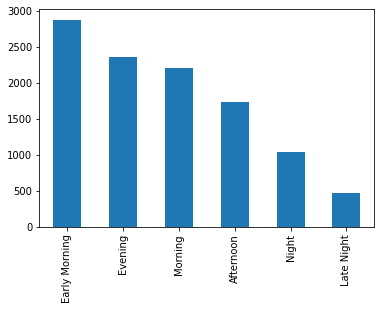

In [413]:
df.Dep_Time_Cat.value_counts().plot(kind='bar')

In [414]:
def preprocess_duration(x):
    
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x= x+ ' 0m'
    a = int(x.split(' ')[0].strip('h'))
    b = int(x.split(' ')[1].strip('m'))        
    return (a*60) + b
df['Dur_Tot_Mins'] = df.Duration.apply(preprocess_duration)

In [415]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [416]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [418]:
df[(df.Destination == 'Delhi') | (df.Destination == 'New Delhi')]['Route'].value_counts()

BLR → DEL                            1552
BLR → BOM → DEL                       402
BLR → HYD → DEL                        37
BLR → MAA → DEL                        29
BLR → AMD → DEL                        18
BLR → COK → DEL                        15
BLR → CCU → DEL                        11
BLR → CCU → GAU → DEL                  11
BLR → BOM → BHO → DEL                  11
BLR → HYD → VGA → DEL                  10
BLR → BOM → NAG → DEL                  10
BLR → VGA → DEL                         9
BLR → BDQ → DEL                         8
BLR → GOI → DEL                         7
BLR → BOM → JDH → DEL                   6
BLR → IDR → DEL                         5
BLR → CCU → BBI → DEL                   5
BLR → BBI → DEL                         5
BLR → BOM → IDR → DEL                   5
BLR → PNQ → DEL                         5
BLR → BOM → AMD → DEL                   5
BLR → VGA → HYD → DEL                   4
BLR → BOM → UDR → DEL                   3
BLR → GAU → DEL                   

In [419]:
'''
Since Both 'New Delhi' and 'Delhi' are same destinations,
we can combine them together in Destination Column
'''

# Function to combine desitnations together

def destination_cleaning(x):
            
    if ('Delhi' or 'New Delhi') not in x:
        return x
    else:
        return 'Delhi'

df.Destination = df.Destination.apply(destination_cleaning)



#### Alternate to above function

#### df[col].replace(x1,x,inplace =True)

replace x1 values to x in the given column

<AxesSubplot:ylabel='Destination'>

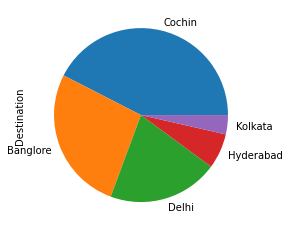

In [437]:
df.Destination.value_counts().plot(kind='pie')

In [429]:
df.Route.value_counts().head(20)

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
DEL → BLR → COK           232
DEL → COK                 213
DEL → AMD → BOM → COK     205
DEL → MAA → COK           146
DEL → IDR → BOM → COK      99
DEL → HYD → MAA → COK      83
DEL → NAG → BOM → COK      71
CCU → MAA → BLR            65
DEL → GOI → BOM → COK      58
DEL → HYD → BOM → COK      56
Name: Route, dtype: int64

# Idea 1: Draw India Map To show top 20 Flights

In [ ]:
df.Dur_Tot_Mins

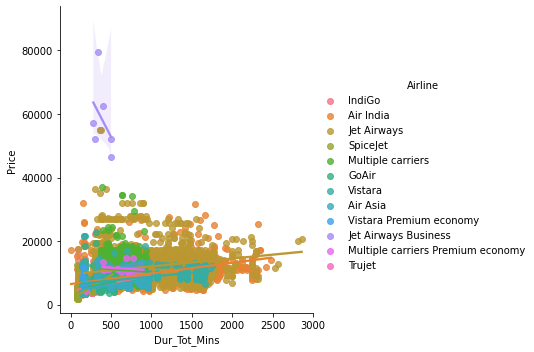

In [438]:
sns.lmplot(y='Price',x='Dur_Tot_Mins',data=df, hue='Airline')

In [439]:
df_airline = df.groupby('Airline')

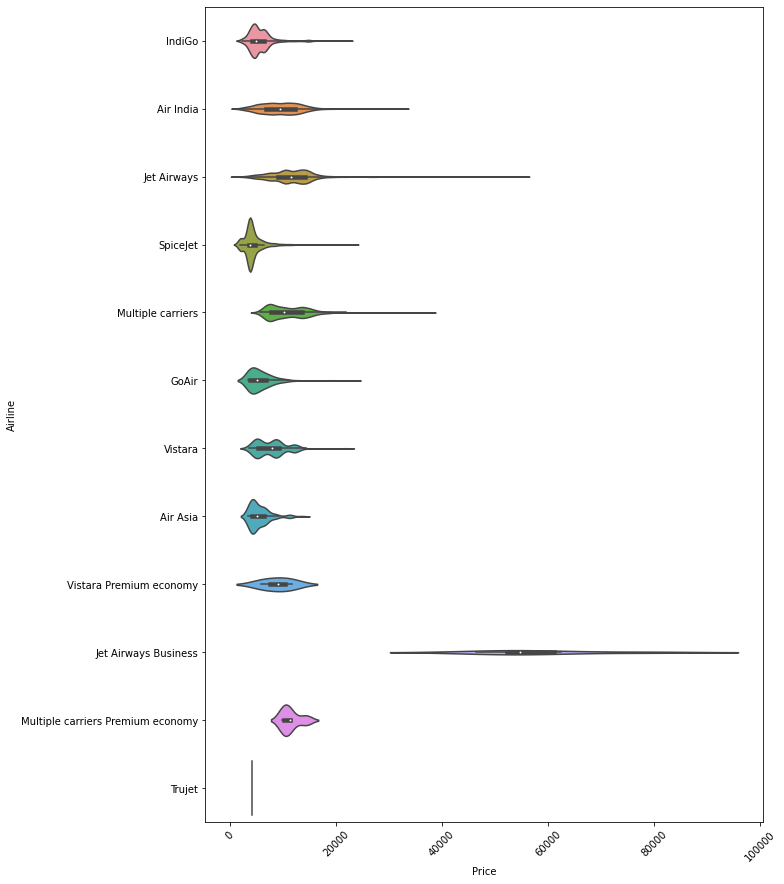

In [460]:
plt.figure(figsize = (10,15))
sns.violinplot(y='Airline',x='Price',data=df)
_ = plt.xticks(rotation = 45)


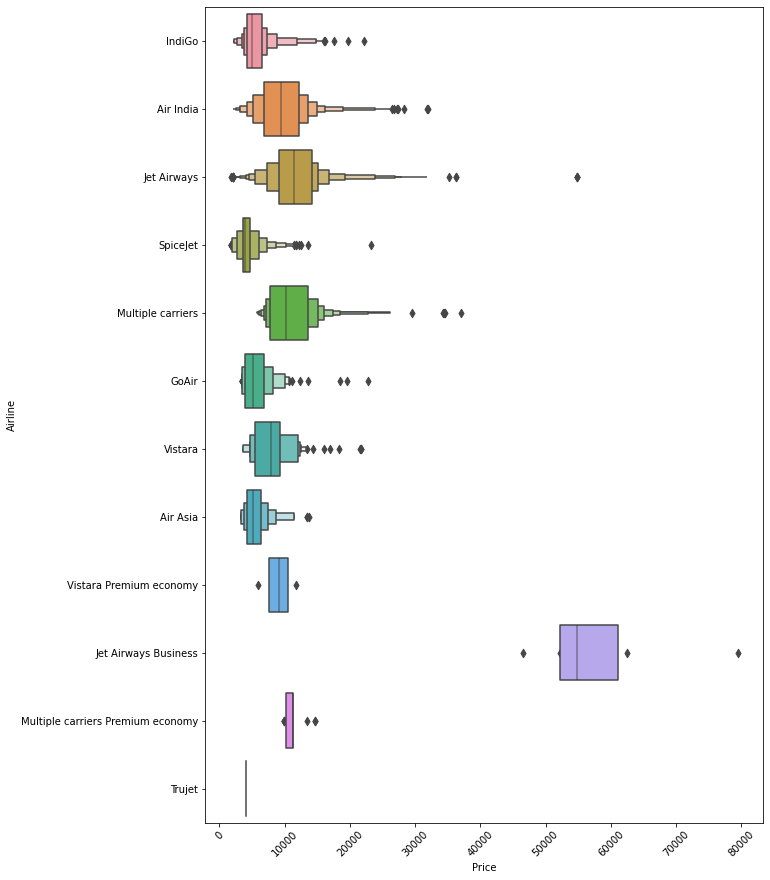

In [463]:
plt.figure(figsize = (10,15))
sns.boxenplot(y='Airline',x='Price',data=df)
_ = plt.xticks(rotation = 45)

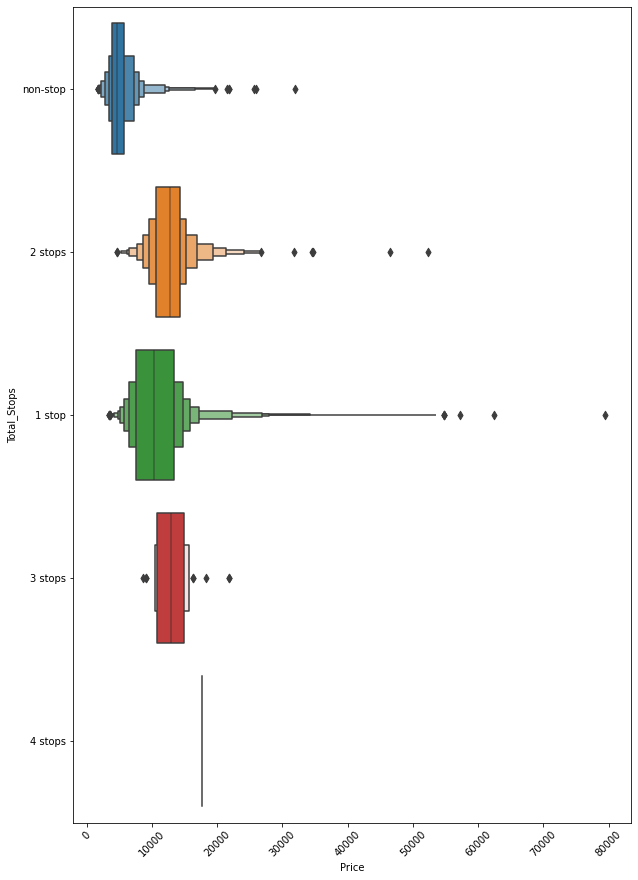

In [483]:
plt.figure(figsize = (10,15))
sns.boxenplot(y='Total_Stops',x='Price',data=df)
_ = plt.xticks(rotation = 45)

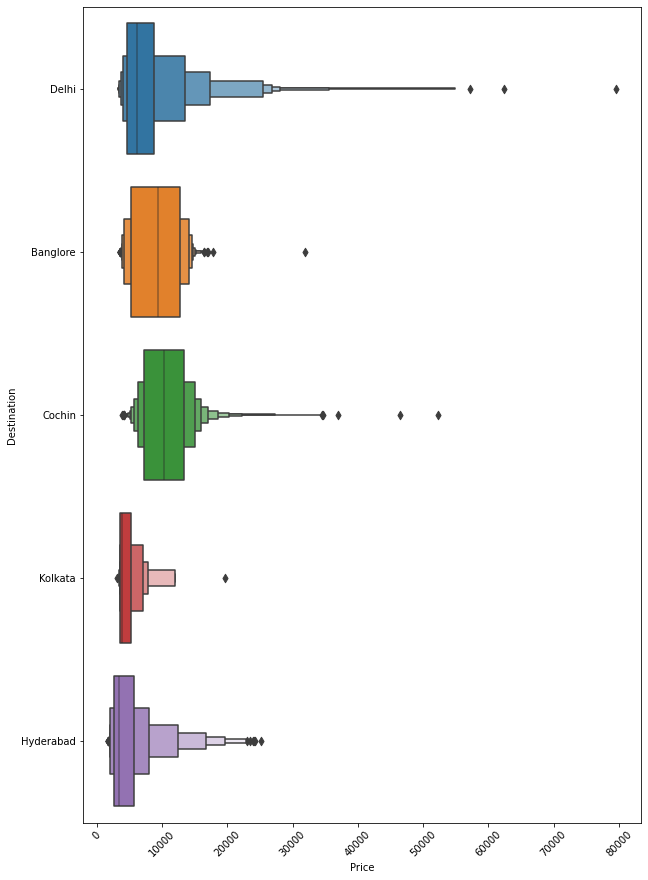

In [505]:
plt.figure(figsize = (10,15))
sns.boxenplot(y='Destination',x='Price',data=df)
_ = plt.xticks(rotation = 45)

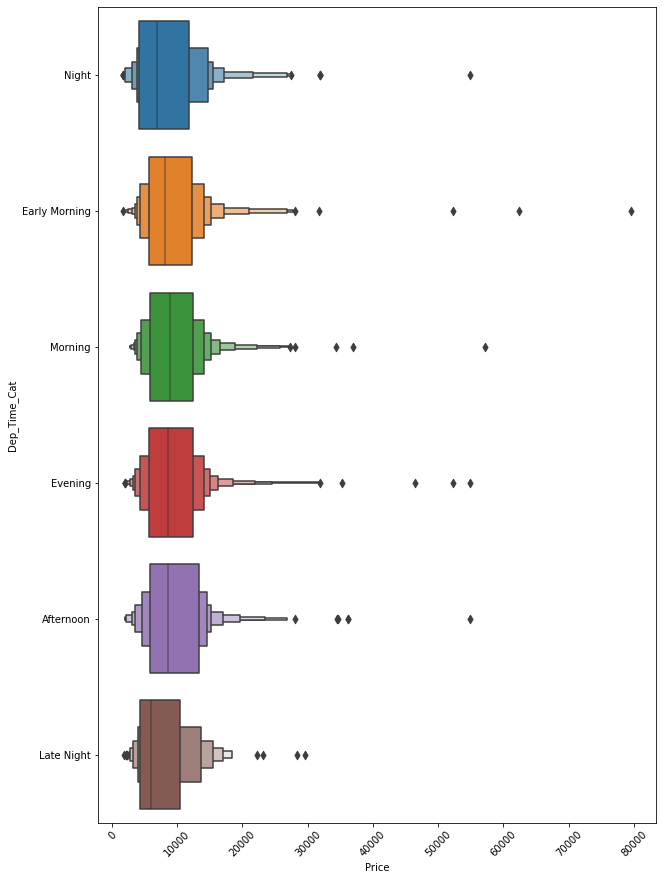

In [517]:
plt.figure(figsize = (10,15))
sns.boxenplot(y='Dep_Time_Cat',x='Price',data=df)
_ = plt.xticks(rotation = 45)

In [467]:
# Checking 'Additional Info' Column
np.round(df.Additional_Info.value_counts(normalize=True)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

##### As 78 % of Data in 'Additional Info' has NO INFO (pun intended) we can drop this column

In [469]:
df.pop('Additional_Info') # Removes the column from data frame

0    No info
1    No info
2    No info
3    No info
4    No info
Name: Additional_Info, dtype: object

In [474]:
df.drop(columns = ['Route','journey_year','Duration'],axis =1 , inplace = True)

In [481]:
# Fix Total_Stops Column
def total_Stops(x):
    if x == 'non-stop':
        return 0
    else:
        x.split(' ')
        x = int(x[0])
        return x
    
df['Total_Stops_1'] = df.Total_Stops.apply(total_Stops)

In [482]:
df.Total_Stops_1.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops_1, dtype: int64

In [476]:
df.shape

(10682, 13)

In [477]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_Tot_Mins
0,IndiGo,Banglore,Delhi,non-stop,3897,3,24,22,20,1,10,Night,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,Early Morning,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,Morning,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,Evening,325
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,Afternoon,285


# Target Encoding

In this scenario we can give high number to a airline which usually has high avg price visa-vis lower number to a airline whose average price is low

In [486]:
airline = df.groupby('Airline')['Price'].mean().sort_values().index

In [487]:
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [488]:
dict1 = {key:index for index,key in enumerate(airline,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [491]:
df['Airline']= df.Airline.map(dict1)

In [500]:
df = pd.concat([df,pd.get_dummies(df['Source'],prefix='Source',prefix_sep='_')],axis=1)

In [501]:
df.drop(columns='Source',inplace=True)
df.head()

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_Tot_Mins,Total_Stops_1,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Delhi,non-stop,3897,3,24,22,20,1,10,Night,170,0,1,0,0,0,0
1,7,Banglore,2 stops,7662,1,5,5,50,13,15,Early Morning,445,2,0,0,0,1,0
2,10,Cochin,2 stops,13882,9,6,9,25,4,25,Morning,1140,2,0,0,1,0,0
3,3,Banglore,1 stop,6218,12,5,18,5,23,30,Evening,325,1,0,0,0,1,0
4,3,Delhi,1 stop,13302,1,3,16,50,21,35,Afternoon,285,1,1,0,0,0,0


In [509]:
dict2 = {key:index for index,key in enumerate(df.groupby('Destination')['Price'].mean().sort_values().index,0)}

In [510]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [511]:
df.Destination = df.Destination.map(dict2)

In [513]:
df.Total_Stops = df.Total_Stops_1

In [515]:
df.pop('Total_Stops_1')

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops_1, Length: 10682, dtype: int64

In [516]:
df.head()

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_Tot_Mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3897,3,24,22,20,1,10,Night,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,Early Morning,445,0,0,0,1,0
2,10,4,2,13882,9,6,9,25,4,25,Morning,1140,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,Evening,325,0,0,0,1,0
4,3,2,1,13302,1,3,16,50,21,35,Afternoon,285,1,0,0,0,0


In [520]:
df.Dur_Tot_Mins.value_counts().head(20)

170    550
90     386
165    337
175    337
155    329
180    261
140    238
150    220
160    158
85     135
135    135
145     98
810     97
800     89
195     88
450     86
570     85
520     81
435     79
185     78
Name: Dur_Tot_Mins, dtype: int64

In [526]:
df.info()
col = ['Price','Dur_Tot_Mins']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Destination          10682 non-null  int64 
 2   Total_Stops          10682 non-null  int64 
 3   Price                10682 non-null  int64 
 4   journey_month        10682 non-null  int64 
 5   journey_day          10682 non-null  int64 
 6   Dep_Time_hour        10682 non-null  int64 
 7   Dep_Time_minute      10682 non-null  int64 
 8   Arrival_Time_hour    10682 non-null  int64 
 9   Arrival_Time_minute  10682 non-null  int64 
 10  Dep_Time_Cat         10682 non-null  object
 11  Dur_Tot_Mins         10682 non-null  int64 
 12  Source_Banglore      10682 non-null  uint8 
 13  Source_Chennai       10682 non-null  uint8 
 14  Source_Delhi         10682 non-null  uint8 
 15  Source_Kolkata       10682 non-null  uint8 
 16  Sour

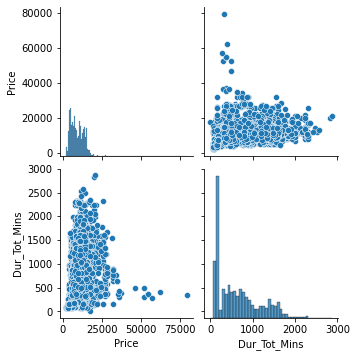

In [527]:
sns.pairplot(df[col])

In [543]:
def plot_df(df,col):
    plt.figure(figsize = (15,10))
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.distplot(df[col],ax=ax2,kde=False)
    sns.boxplot(df[col],ax=ax3)
    
    return

/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without

<Figure size 1080x720 with 0 Axes>

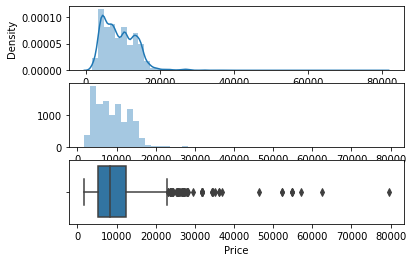

In [544]:
plot_df(df,'Price')

In [548]:
df['Price'] = np.where(df['Price']>=35000, df['Price'].median(),df['Price'])

/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sneha_abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without

<Figure size 1080x720 with 0 Axes>

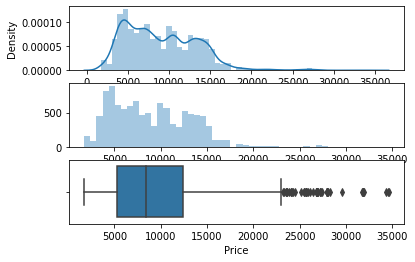

In [549]:
plot_df(df,'Price')

# Feature Importance

In [550]:
from sklearn.feature_selection import mutual_info_regression

In [552]:
X = df
y = X.pop('Price')

In [553]:
X.head()

,Airline,Destination,Total_Stops,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_Tot_Mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3,24,22,20,1,10,Night,170,1,0,0,0,0
1,7,3,2,1,5,5,50,13,15,Early Morning,445,0,0,0,1,0
2,10,4,2,9,6,9,25,4,25,Morning,1140,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,Evening,325,0,0,0,1,0
4,3,2,1,1,3,16,50,21,35,Afternoon,285,1,0,0,0,0


In [555]:
X.drop(columns = 'Dep_Time_Cat', inplace=True)

In [561]:
imp = pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['Feature_Importance']

In [636]:
imp.Feature_Importance.sort_values(ascending=False)

Destination            1.006118
Airline                0.971409
Total_Stops            0.785417
Source_Delhi           0.518790
Dur_Tot_Mins           0.499038
Source_Kolkata         0.450209
Arrival_Time_hour      0.406989
Source_Banglore        0.395547
Arrival_Time_minute    0.347500
Dep_Time_hour          0.329370
Dep_Time_minute        0.250813
journey_month          0.239196
Source_Mumbai          0.200876
journey_day            0.196551
Source_Chennai         0.124962
Name: Feature_Importance, dtype: float64

In [638]:
df.shape

(10682, 15)

# Building ML Models

1. Building Basic ML Models \n
(1.1 Divide Data in Test Train)
2. Optimizing our ML Model by tuning Hyperparameters

In [583]:
X_test.shape

(2671, 15)

In [582]:
y_test.shape

(2671,)

In [621]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [606]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [608]:
y_test.shape

(2671, 1)

In [622]:
from sklearn.ensemble import RandomForestRegressor

In [623]:
rnd_model = RandomForestRegressor()

In [624]:
model = rnd_model.fit(X_train,y_train)

In [625]:
y_pred = model.predict(X_test)

In [626]:
y_pred = y_pred.reshape(-1,1)

In [627]:
model.score(X_test,y_test)

0.8141931526263305

### Random Forest Scores by taking X_test,y_test and not y_test,y_pred

### Creating own Function to calculate MAPE for the above code

In [632]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
    

In [633]:
mape(y_test,y_pred)

68.6641583348709

# Automate ML Pipeline

In [655]:
def model_pipeline(model,X,y,split,random_state):
    from sklearn import metrics
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split,random_state=random_state)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print('We Ran {} Machine Learning Model: \n'.format(str(model)))
    print('Train Data Score of the is: {}'.format(model.score(X_train,y_train)))
    print('Test Data Score of the is: {}'.format(model.score(X_test,y_test)))
    print('R^2 Score for Model is: {}', metrics.r2_score(y_test,y_pred))
    print('MSE Score for Model is: {}', metrics.mean_squared_error(y_test,y_pred))
    print('MAE Score for Model is: {}', metrics.mean_absolute_error(y_test,y_pred))
    print('RMSE Score for Model is: {}', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('MAPE Score for Model is: {} ', metrics.mean_absolute_percentage_error(y_test,y_pred))
    print('\n Distribution Plot of the error is: \n')
    
    sns.displot(y_test - y_pred,kde=True)

We Ran RandomForestRegressor() Machine Learning Model: 

Train Data Score of the is: 0.9512985098219797
Test Data Score of the is: 0.8145911080898163
R^2 Score for Model is: {} 0.8145911080898163
MSE Score for Model is: {} 3609466.082118467
MAE Score for Model is: {} 1167.8987612140552
RMSE Score for Model is: {} 1899.8594900987987
MAPE Score for Model is: {}  0.13135479221790214

 Distribution Plot of the error is: 



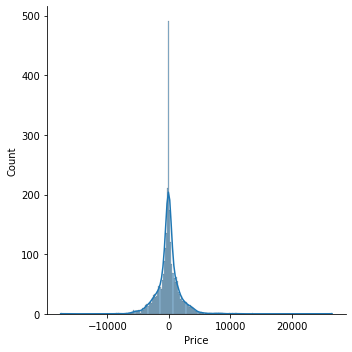

In [658]:
model_pipeline(RandomForestRegressor(),X,y,0.25,42)

### Dropping 'Duration_Tot_min' column and testing

We Ran RandomForestRegressor() Machine Learning Model: 

Train Data Score of the is: 0.9513597728626769
Test Data Score of the is: 0.8180330727857126
R^2 Score for Model is: {} 0.8180330727857126
MSE Score for Model is: {} 3542459.291356213
MAE Score for Model is: {} 1156.0565805253964
RMSE Score for Model is: {} 1882.1422080587356
MAPE Score for Model is: {}  0.13027154755751455

 Distribution Plot of the error is: 



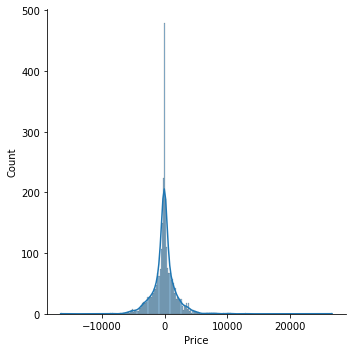

In [659]:
model_pipeline(RandomForestRegressor(),x1,y1,0.25,42)

### Dropping 'journey day' columns and testing

In [660]:
df.head()

,Airline,Destination,Total_Stops,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_Tot_Mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3,24,22,20,1,10,170,1,0,0,0,0
1,7,3,2,1,5,5,50,13,15,445,0,0,0,1,0
2,10,4,2,9,6,9,25,4,25,1140,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,325,0,0,0,1,0
4,3,2,1,1,3,16,50,21,35,285,1,0,0,0,0


In [661]:
x3 = df.drop(columns='journey_day')
y3 = y

We Ran RandomForestRegressor() Machine Learning Model: 

Train Data Score of the is: 0.8867315338132926
Test Data Score of the is: 0.703980089972474
R^2 Score for Model is: {} 0.703980089972474
MSE Score for Model is: {} 5762797.101412527
MAE Score for Model is: {} 1497.3231256512565
RMSE Score for Model is: {} 2400.58265873361
MAPE Score for Model is: {}  0.1726606848933608

 Distribution Plot of the error is: 



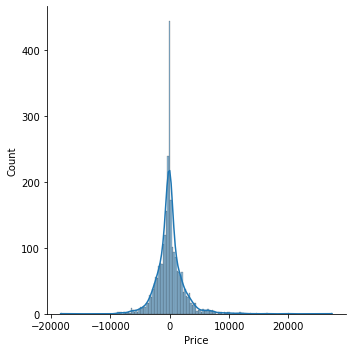

In [662]:
model_pipeline(RandomForestRegressor(),x3,y3,0.25,42)

# Saving ML Model using Pickle

In [588]:
import pickle

In [589]:
file = open('price_predictor.pkl', 'wb')

In [590]:
pickle.dump(model,file)

In [591]:
model_1 = open('price_predictor.pkl','rb')

In [593]:
forest = pickle.load(model_1)
forest.predict(X_test)

array([16658.33,  6175.49,  8883.08, ...,  3533.46,  6468.97,  7185.05])